# FIFA 21 Project

# Import preliminary libs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [5]:
fifa = pd.read_csv('players_20.csv')

In [379]:
fifa21 = pd.read_csv('fifa21_male2.csv')

D:\Program Files (x86)\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning:

Columns (78) have mixed types.Specify dtype option on import or set low_memory=False.



In [380]:
fifa21.shape

(17125, 107)

# Data Cleaning

In [381]:
missed = pd.DataFrame()
missed['column'] = fifa21.columns

missed['percent'] = [
    round(100* fifa21[col].isnull().sum() / len(fifa21), 2) for col in fifa21.columns
]
missed = missed[missed['percent']>0].sort_values('percent')

fig = px.bar(
    missed, 
    x='percent',
    y="column", 
    orientation='h', 
    title='Percent of Missing Values per Column', 
    height=1300, 
    width=800
)
fig.show()


In [382]:
fifa21.drop(['Loan Date End','Joined','Hits','Gender'],axis=1,inplace=True)

In [383]:
fifa21.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3


In [384]:
fifa21.Value.head(),fifa21.Wage.head(),fifa21['Release Clause'].head()

(0    €625K
 1    €600K
 2    €1.1M
 3       €0
 4    €5.5M
 Name: Value, dtype: object,
 0     €7K
 1     €7K
 2    €15K
 3      €0
 4    €12K
 Name: Wage, dtype: object,
 0       €0
 1    €1.1M
 2       €0
 3       €0
 4    €7.2M
 Name: Release Clause, dtype: object)

## Clean the money

In [385]:
#cleaning the Value column
def clean_money(column):
    values = []
    for value in fifa21[column]:
        if value[-1]=='M':
            money = 1000000
            money *= float(value[1:-1])
        elif value[-1]=='K':
            money = 1000
            money *= float(value[1:-1])
        else: 
            money = 0
        values.append(money)
    return values

# Cleaning Weight column
def clean_weight():
    weights = []
    for weight in fifa21['Weight'].fillna(''):
        if weight != '':
            weights.append(int(weight[:-3]))
        else:
            weights.append(np.nan)
    return weights

# Cleaning Height Column
def clean_height():
    heights = []
    for height in fifa21['Height'].fillna(''):
        if height != '':
            height =int(height[0])*12 + int(height[2])
            heights.append(height)
        else:
            heights.append(np.nan)
    return heights

# # Cleaning Release Clause

def clean_release_clause():
    release_clause = []
    for clause in fifa21['Release Clause'].fillna(''):
        if clause == '':
            money=0.0
        elif clause[-1]=='M':
            money = 1000000
            money *= float(clause[1:-1])
        elif clause[-1]=='K':
            money = 1000
            money *= float(clause[1:-1])
        else: 
            money = 0
        release_clause.append(money)
    return release_clause


In [386]:
fifa21['Value'] =  clean_money('Value')
fifa21['Wage'] = clean_money('Wage')
fifa21['Weight'] = clean_weight()
fifa21['Height'] = clean_height()
fifa21['Release Clause'] = clean_release_clause()

In [387]:
(fifa21).describe()

,ID,Age,OVA,BOV,POT,Height,Weight,Growth,Value,Wage,...,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,1.712500e+04,17125.000000,...,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000
mean,219388.716204,25.272934,66.965022,67.900204,72.489810,68.941664,165.658861,5.524788,2.567377e+06,10436.963504,...,15.514277,15.738628,1631.256175,361.372146,68.091620,54.967299,58.926540,64.209869,50.266102,64.910715
std,37499.197507,4.942665,6.864329,6.637538,5.769949,5.344764,15.818185,5.787539,5.372622e+06,21191.481943,...,16.406064,17.130908,260.357024,40.252290,11.147116,13.877605,10.186728,9.832734,16.853801,9.660260
min,2.000000,16.000000,38.000000,42.000000,47.000000,61.000000,110.000000,-1.000000,0.000000e+00,0.000000,...,1.000000,1.000000,731.000000,228.000000,25.000000,16.000000,25.000000,28.000000,12.000000,27.000000
25%,204082.000000,21.000000,62.000000,64.000000,69.000000,61.000000,154.000000,0.000000,3.750000e+05,1000.000000,...,8.000000,8.000000,1492.000000,333.000000,62.000000,46.000000,52.000000,59.000000,35.000000,59.000000
50%,228961.000000,25.000000,67.000000,68.000000,72.000000,69.000000,165.000000,4.000000,8.000000e+05,3000.000000,...,11.000000,11.000000,1659.000000,362.000000,69.000000,58.000000,60.000000,65.000000,53.000000,66.000000
75%,243911.000000,29.000000,72.000000,72.000000,76.000000,73.000000,176.000000,9.000000,2.400000e+06,11000.000000,...,14.000000,14.000000,1812.000000,390.000000,75.000000,65.000000,66.000000,71.000000,64.000000,72.000000
max,259105.000000,53.000000,93.000000,93.000000,95.000000,81.000000,243.000000,26.000000,1.055000e+08,560000.000000,...,93.000000,90.000000,2316.000000,498.000000,96.000000,93.000000,93.000000,95.000000,91.000000,93.000000


## Removing zeroes in wage,release clause, and value columns

In [388]:
sum(fifa21.Value==0)

457

In [389]:
dropdex = (fifa21.loc[fifa21.Value==0].index)
dropdex = dropdex.append((fifa21.loc[fifa21.Wage==0].index))
dropdex = dropdex.append((fifa21.loc[fifa21['Release Clause']==0].index))
dropdex = np.unique(dropdex)
dropdex

array([    0,     2,     3, ..., 17117, 17118, 17120], dtype=int64)

In [77]:
f21 = fifa21.copy()

In [79]:
f21.to_csv('fifa21.csv')

In [390]:
for idx in dropdex:
    fifa21.drop(index = idx, inplace = True)

In [15]:
print(sum(fifa21.Value==0),sum(fifa21.Wage==0),sum(fifa21['Release Clause']==0))

0 0 0


In [16]:
fifa21.shape

(12691, 103)

# Feature Engineering

## General Position 

In [73]:
conditions = [
    (fifa21['BP'] == 'RF') | (fifa21['BP'] == 'ST') | (fifa21['BP'] == 'LW') | (fifa21['BP'] == 'LF') | (fifa21['BP'] == 'RS') | (fifa21['BP'] == 'LS') | (fifa21['BP'] == 'RW') | (fifa21['BP'] == 'CF')
    ,(fifa21['BP'] == 'RCM') | (fifa21['BP'] == 'LCM') | (fifa21['BP'] == 'LDM') | (fifa21['BP'] == 'CAM') | (fifa21['BP'] == 'CDM') | (fifa21['BP'] == 'RM') | (fifa21['BP'] == 'LAM') | (fifa21['BP'] == 'LM') | (fifa21['BP'] == 'RDM') | (fifa21['BP'] == 'CM') | (fifa21['BP'] == 'RAM')
    ,(fifa21['BP'] == 'RCB') | (fifa21['BP'] == 'CB') | (fifa21['BP'] == 'LCB') | (fifa21['BP'] == 'LB') | (fifa21['BP'] == 'RB') | (fifa21['BP'] == 'LWB') | (fifa21['BP'] == 'RWB')
    ,(fifa21['BP'] == 'GK')]

choices = ['ATK','MID','DEF',"GK"]
fifa21['GPOS'] = np.select(conditions, choices, default='N/A')
fifa21['GPOS']

0        DEF
1        MID
2        MID
3        ATK
4        MID
        ... 
17120    DEF
17121    MID
17122    DEF
17123    DEF
17124    ATK
Name: GPOS, Length: 17125, dtype: object

# BMI

In [74]:
fifa21.Height[1]

61

In [75]:
import math

In [76]:
fifa21['BMI'] = fifa21.Weight*0.453592/pow((fifa21.Height*2.54)/100,2)

## Encode GPOS

In [25]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
fifa21['GPOS']= label_encoder.fit_transform(fifa21['GPOS']) 
  
fifa21['GPOS'].unique() 

array([3, 2, 1, 0], dtype=int64)

In [24]:
label_encoder.inverse_transform(fifa21.GPOS)

array(['MID', 'MID', 'MID', ..., 'DEF', 'DEF', 'ATK'], dtype=object)

# Visualize relationships with Value
## Maybe they will be included in our model?

# Players Valued > 500M

In [415]:
pd.set_option('display.max_columns', None)
top_val = pd.DataFrame(fifa21.loc[(fifa21['Value']>50000000)])
top_val = top_val[['Name','Age','OVA','BP','Value']]
top_val.sort_values('Value',ascending=False)

,Name,Age,OVA,BP,Value
9331,K. Mbappé,21,90,ST,105500000.0
2650,Neymar Jr,28,91,LW,90000000.0
2871,K. De Bruyne,29,91,CAM,87000000.0
2287,R. Lewandowski,31,91,ST,80000000.0
5030,S. Mané,28,90,LW,78000000.0
5109,M. Salah,28,90,RW,78000000.0
4166,V. van Dijk,28,90,CB,75500000.0
3665,J. Oblak,27,91,GK,75000000.0
4049,R. Sterling,25,88,LW,72500000.0
3961,H. Kane,26,88,ST,71000000.0


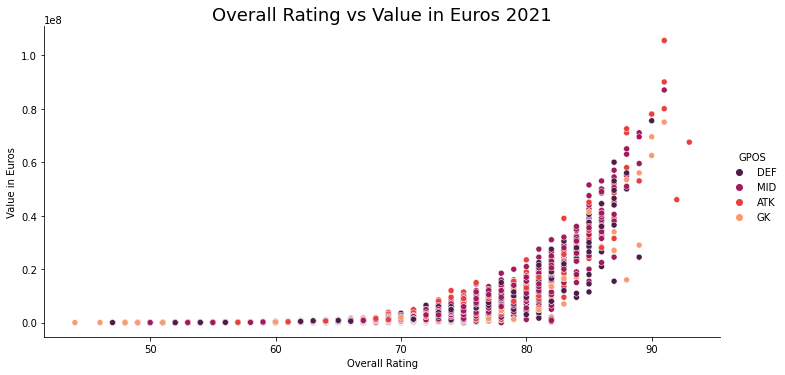

In [560]:
sns.relplot(x='BOV',y='Value',hue='GPOS',palette = 'rocket',sizes=(15, 30),aspect=2,data=fifa21)
plt.title('Overall Rating vs Value in Euros 2021',fontsize = 18)
plt.xlabel('Overall Rating')
plt.ylabel('Value in Euros')
plt.show()

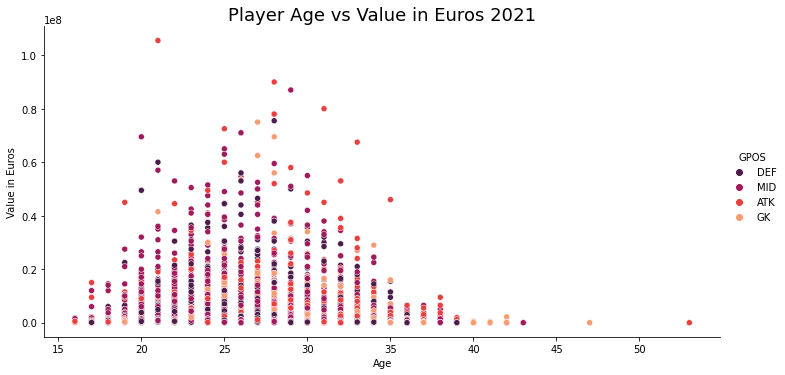

In [500]:
sns.relplot(x='Age',y='Value',hue='GPOS',palette = 'rocket',sizes=(15, 30),aspect=2,data=fifa21)
plt.title('Player Age vs Value in Euros 2021',fontsize = 18)
plt.xlabel('Age')
plt.ylabel('Value in Euros')
plt.show()

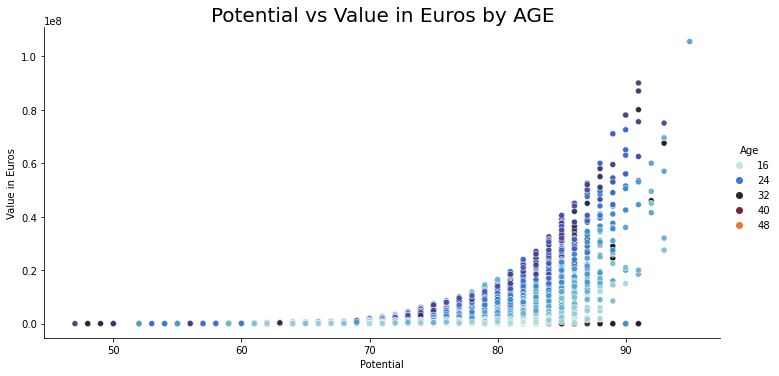

In [506]:
sns.relplot(x='POT',y='Value',hue='Age',palette = 'icefire',sizes=(10, 20),aspect=2,data=fifa21)
plt.title('Potential vs Value in Euros by AGE',fontsize = 20)
plt.xlabel('Potential')
plt.ylabel('Value in Euros')
plt.show()

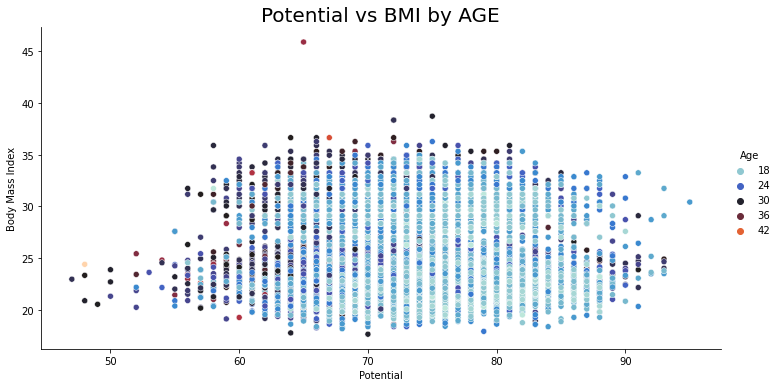

In [582]:
sns.relplot(x='POT',y='BMI',hue='Age',palette = 'icefire',sizes=(10, 20),aspect=2,data=fifa21)
plt.title('Potential vs BMI by AGE',fontsize = 20)
plt.xlabel('Potential')
plt.ylabel('Body Mass Index')
plt.show()

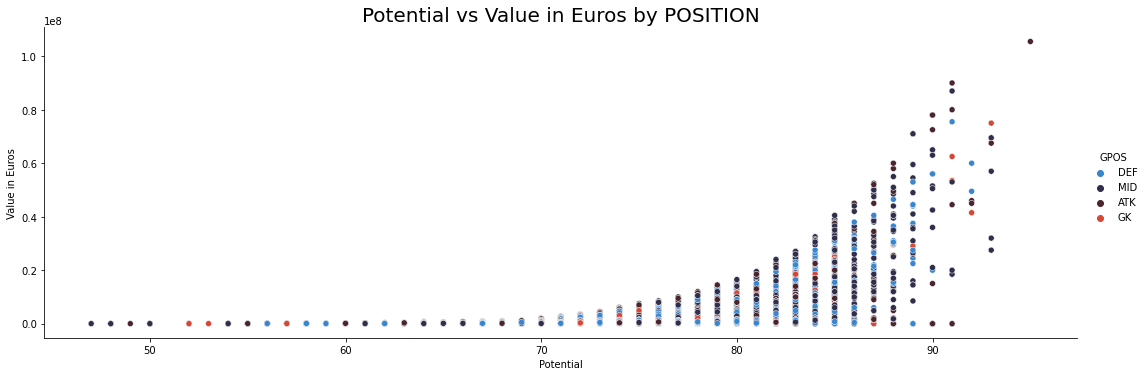

In [510]:
sns.relplot(x='POT',y='Value',hue='GPOS',palette = 'icefire',sizes=(10, 20),aspect=3,data=fifa21)
plt.title('Potential vs Value in Euros by POSITION',fontsize = 20)
plt.xlabel('Potential')
plt.ylabel('Value in Euros')
plt.show()

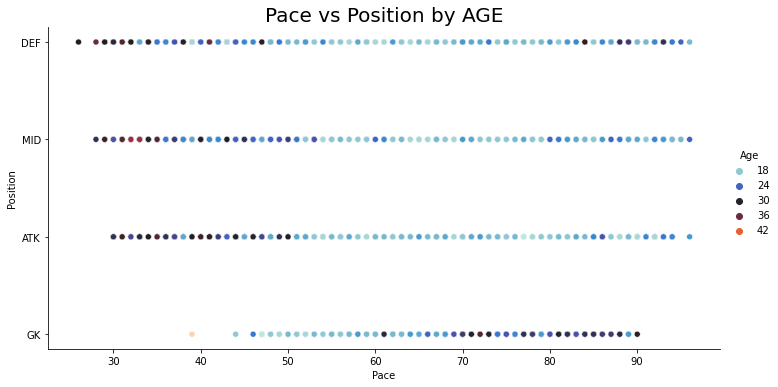

In [563]:
sns.relplot(x='PAC',y='GPOS',hue='Age',palette = 'icefire',sizes=(10, 20),aspect=2,data=fifa21)
plt.title('Pace vs Position by AGE',fontsize = 20)
plt.xlabel('Pace')
plt.ylabel('Position')
plt.show()

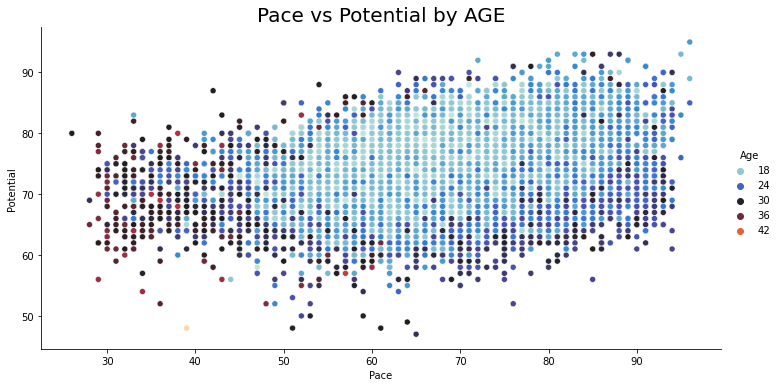

In [565]:
sns.relplot(x='PAC',y='POT',hue='Age',palette = 'icefire',sizes=(10, 20),aspect=2,data=fifa21)
plt.title('Pace vs Potential by AGE',fontsize = 20)
plt.xlabel('Pace')
plt.ylabel('Potential')
plt.show()

### Would be hard to predict pace with value as most are are worth under 400k

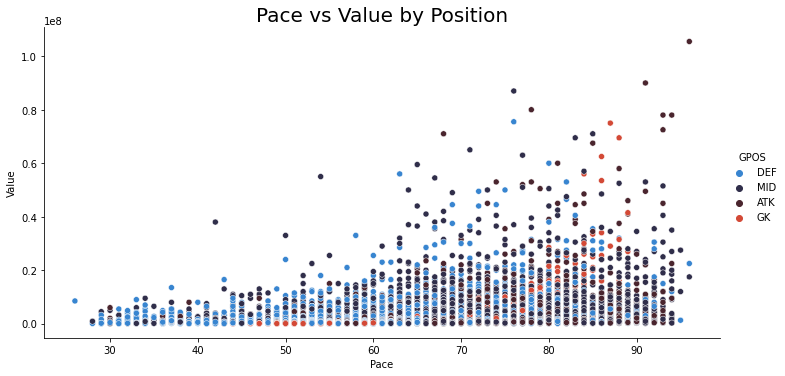

In [564]:
sns.relplot(x='PAC',y='Value',hue='GPOS',palette = 'icefire',sizes=(10, 20),aspect=2,data=fifa21)
plt.title('Pace vs Value by Position',fontsize = 20)
plt.xlabel('Pace')
plt.ylabel('Value')
plt.show()

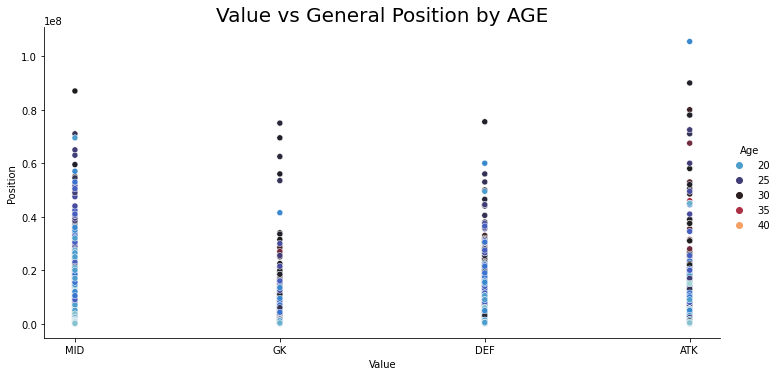

In [277]:
sns.relplot(x='GPOS',y='Value',hue='Age',palette = 'icefire',sizes=(10, 20),aspect=2,data=fifa21)
plt.title('Value vs General Position by AGE',fontsize = 20)
plt.xlabel('Value')
plt.ylabel('Position')
plt.show()

## Base Stats, Total Stats, POT, PAC, OVA, and Skill are normally distributed...

### there are nice correlations in the above features as well as in Wage and Value

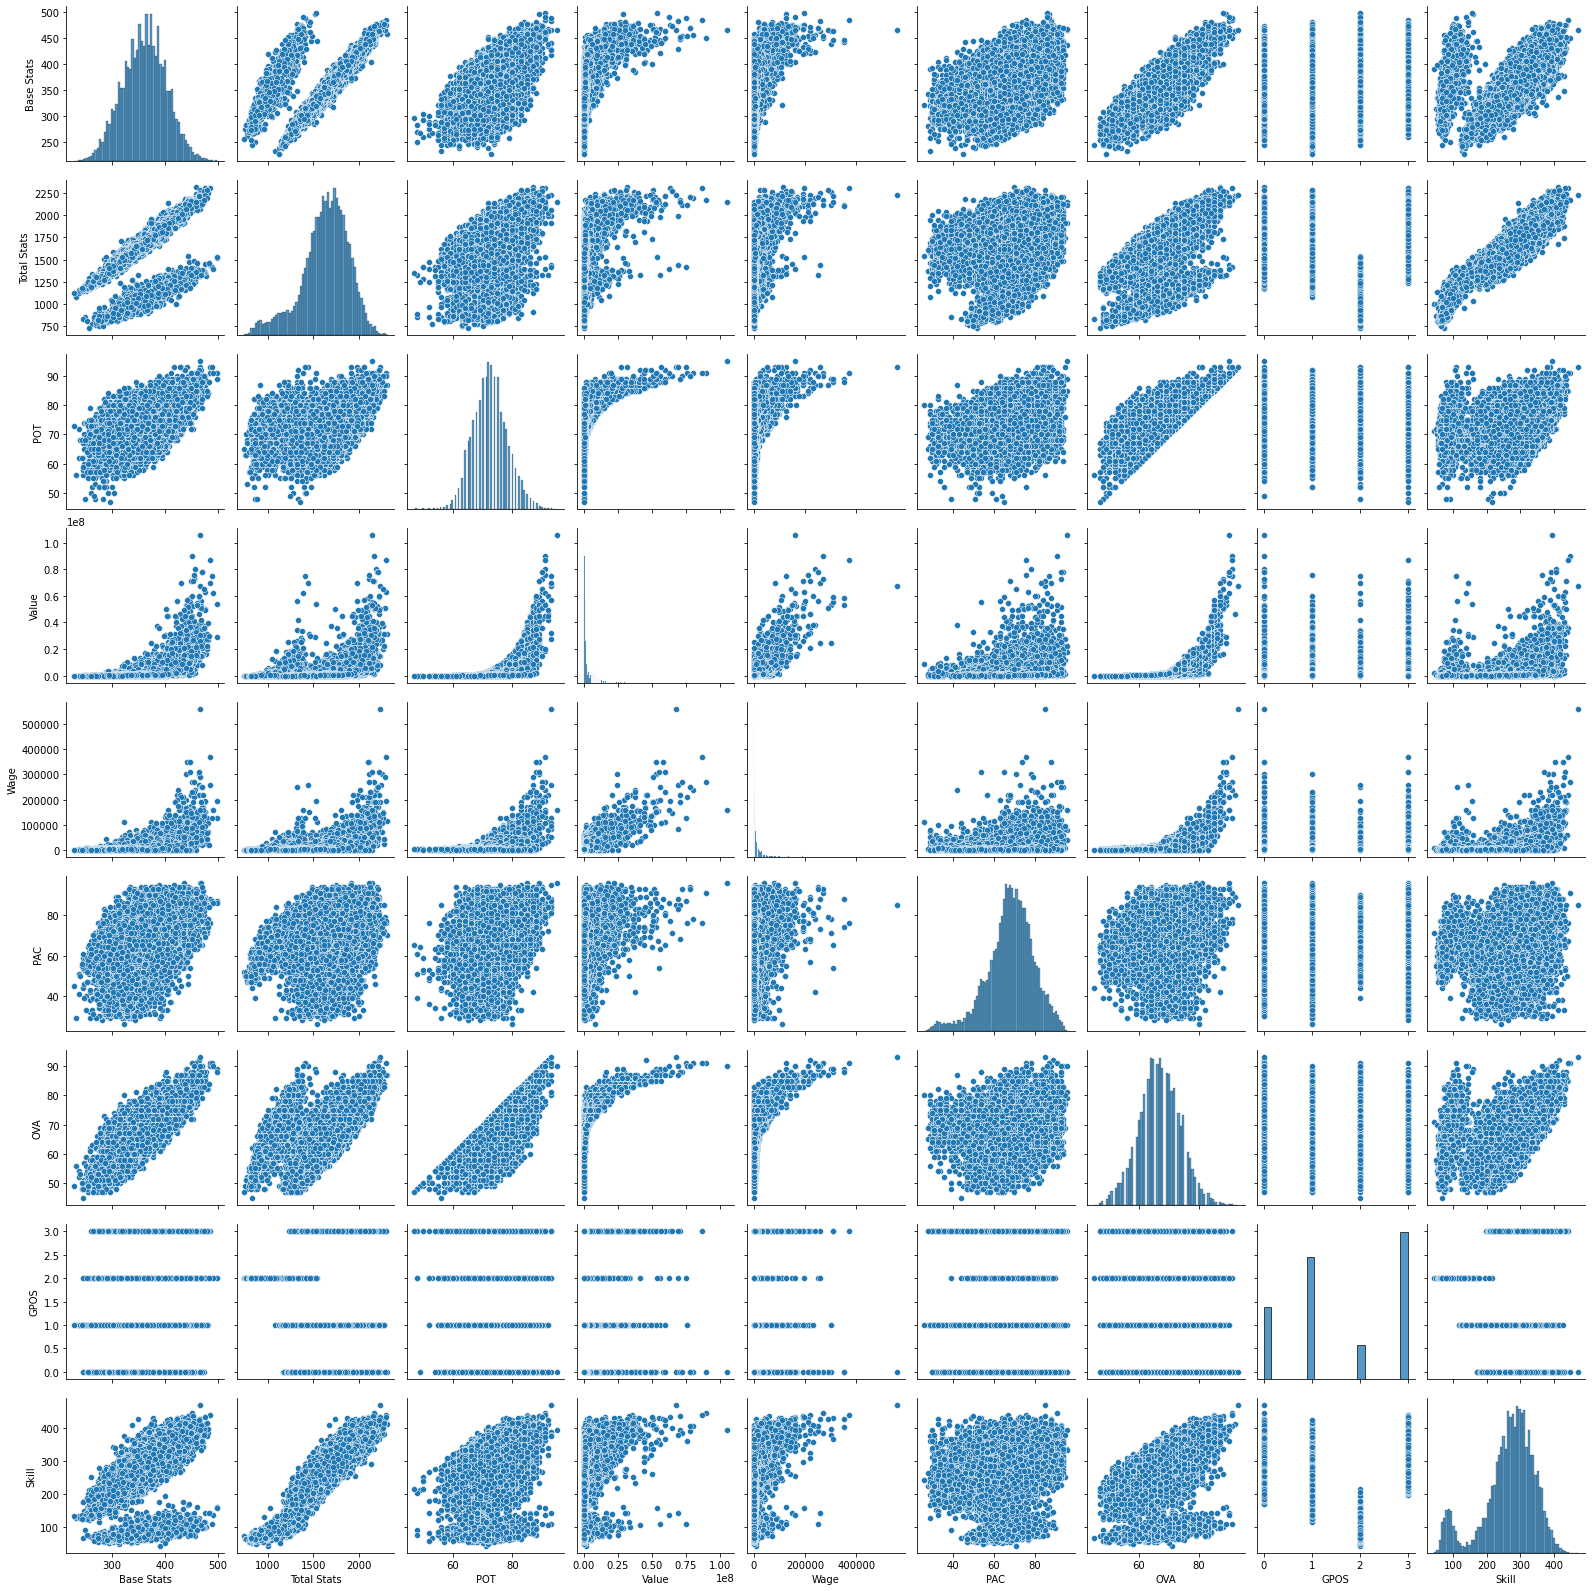

<Figure size 2880x5760 with 0 Axes>

In [586]:
# maybe encode GPOS so we can visualize that too?
sns.pairplot(fifa21[['Base Stats','Total Stats',"POT","Value","Wage","PAC","OVA",'GPOS','Skill']], palette='icefire')
plt.figure(figsize=(40,80))
plt.show()

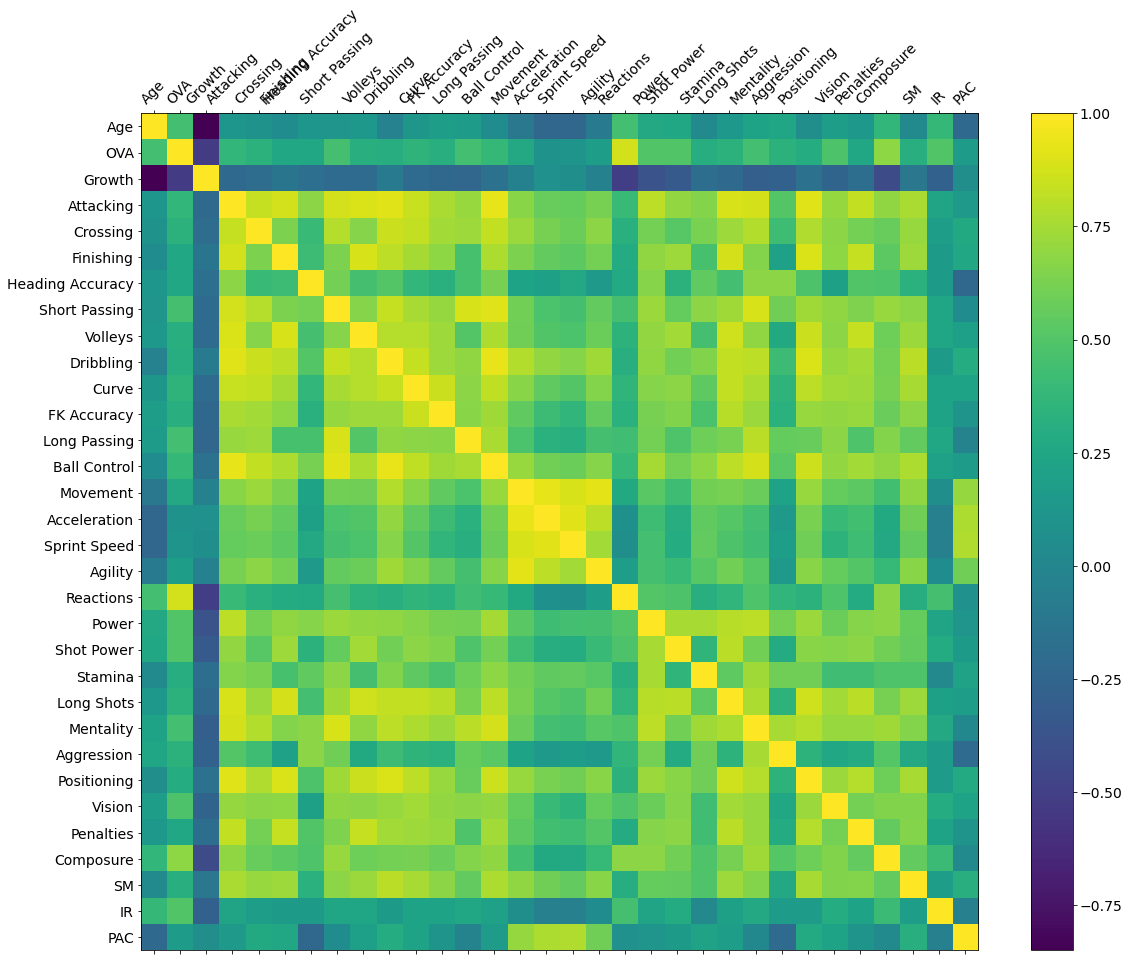

In [220]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

# Modeling

In [54]:
df = fifa21.copy()

In [55]:
#for col in df.columns:
#    print(col)

In [56]:
categorical = [
    'Nationality', 
    'Club', 
    'foot',
    'A/W',
    'D/W',
    'W/F',
    'BP',
    'SM',
    'IR'
]

In [57]:
for item in categorical:
    df[item] = df[item].fillna('0') 
    le = preprocessing.LabelEncoder()
    df[item] = le.fit_transform(df[item])

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12691 entries, 1 to 17124
Columns: 105 entries, ID to BMI
dtypes: float64(14), int32(9), int64(48), object(34)
memory usage: 10.5+ MB


In [59]:
drop = [
    'ID', 'Name', 'Player Photo' 
     ,'POT', 'Club Logo', 'Flag Photo' 
      ,'Team & Contract','Contract' , 'Position', 'BOV'
    
    ,'Release Clause'
    ,'Wage' 
    #,'Growth'
    ,'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF' 
    ,'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM' 
    ,'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB','GK'
    
    #,'PAC' 
    ,'SHO', 'PAS', 'DRI', 'DEF', 'PHY'
    , 'Total Stats','Base Stats' 
    ,'Skill'
    ,'GPOS'
    , 'BMI'
,'Nationality'
,'Club'
,'BP'
,'Height'
,'Weight'
,'foot'
,'Balance'
,'Jumping'
,'Strength'
,'Interceptions'
,'Defending'
,'Marking'
,'Standing Tackle'
,'Sliding Tackle'
,'Goalkeeping'
,'GK Diving'
,'GK Handling'
,'GK Kicking'
,'GK Positioning'
,'GK Reflexes'
,'W/F'
,'A/W'
,'D/W'
]

df = df.drop(drop, axis=1)

In [60]:
for col in df.columns:
    if abs(df[col].corr(df['Value'])) < 0.15:
        print (col)
        #df = df.drop([col], axis=1)

df.columns

Age


Index(['Age', 'OVA', 'Growth', 'Value', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Power',
       'Shot Power', 'Stamina', 'Long Shots', 'Mentality', 'Aggression',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'SM', 'IR', 'PAC'],
      dtype='object')

In [61]:
len(df.columns)

33

In [62]:
numerical=[]
for i in df.columns:
    if i in categorical:
        pass
    else:
        numerical.append(i)
numerical

['Age',
 'OVA',
 'Growth',
 'Value',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Power',
 'Shot Power',
 'Stamina',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'PAC']

In [65]:
target = np.log1p(df['Value'])
original_target = df['Value']
df = df.drop(['Value'], axis=1)

In [36]:
#df['Value'] = np.log1p(df['Value'])

KeyError: 'Value'

In [64]:
#df.to_csv('FIFATrain.csv')

In [ ]:
#df=pd.read_csv('FIFATrain.csv')

In [37]:
sum(df.Value.loc[df.Value==0])

AttributeError: 'DataFrame' object has no attribute 'Value'

In [38]:
df

,Age,OVA,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,...,Long Shots,Mentality,Aggression,Positioning,Vision,Penalties,Composure,SM,IR,PAC
1,37,71,0,337,68,64,61,76,68.0,69,...,71,362,71,72.0,73.0,75,79.0,2,0,53
4,36,81,0,367,75,69,54,90,79.0,85,...,70,370,58,78.0,93.0,71,89.0,3,3,58
6,38,77,0,342,80,66,43,84,69.0,77,...,76,384,87,65.0,85.0,85,80.0,3,1,44
26,42,82,0,95,13,15,13,37,17.0,26,...,13,150,38,12.0,50.0,22,70.0,0,3,77
41,37,72,0,93,18,11,14,39,11.0,12,...,11,142,41,12.0,40.0,23,59.0,0,1,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17119,19,60,12,67,12,8,16,23,8.0,9,...,7,122,21,6.0,55.0,33,40.0,0,0,60
17121,18,56,10,248,50,43,50,64,41.0,57,...,48,259,51,55.0,53.0,50,46.0,1,0,62
17122,18,56,11,218,55,34,53,42,34.0,52,...,37,256,58,49.0,45.0,49,43.0,1,0,63
17123,20,62,11,223,62,26,52,60,23.0,55,...,33,257,61,46.0,56.0,36,54.0,1,0,71


In [40]:
#sum(df.POT.isna())

In [48]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing

In [39]:
scaler=MinMaxScaler()

X = df.copy()

y = target.copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.33, random_state=99,shuffle=True)

X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)

# Linear Regression

In [43]:
reg = LinearRegression()

reg.fit(X_train,y_train)

pred = reg.predict(X_train)

scores = cross_val_score(reg,X,y)
 
pred_1 = reg.predict(X_test)

respred=(np.expm1(pred_1))
restrue=(np.expm1(y_test))


#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
#Real value MAPE
LR_MAPE= MAPE(y_test,pred_1)

print('MAPE:', '{:0.3f}'.format(LR_MAPE)+'%')
print('Train r2 Score:','{:0.3f}'.format(reg.score(X_train, y_train)*100)+'%')
print('Test r2 Score:','{:0.3f}'.format(reg.score(X_test, y_test)*100))
print('Adjusted r2 Score:','{:0.3f}'.format((1-((1-reg.score(X_test, y_test)*100)*((4188-1))/(4188-35-1))))+'%')
#print('MSE:', mean_squared_error(y_true=restrue, y_pred=respred,squared=True))
print('RMSE:', mean_squared_error(restrue, respred,squared=False))
print('MAE:', mean_absolute_error(restrue, respred))

respred=np.array(np.expm1(pred_1)).reshape(-1,1)
restrue=np.array(np.expm1(y_test)).reshape(-1,1)
print('Cross Validation Score:','{:0.3f}'.format(cross_val_score(reg,restrue,respred,cv=2).mean()*100)+'%')

MAPE: 1.274%
Train r2 Score: 96.791%
Test r2 Score: 96.688
Adjusted r2 Score: 97.494%
RMSE: 3570337.072269582
MAE: 716693.0674474129
Cross Validation Score: 91.488%


## Our Model is quite accurate given our normalized value distribution

(array([  17.,  115.,  770., 2352., 4149., 2073., 1743., 1146.,  268.,
          58.]),
 array([ 9.61587214, 10.50170708, 11.38754202, 12.27337696, 13.15921189,
        14.04504683, 14.93088177, 15.81671671, 16.70255165, 17.58838658,
        18.47422152]),
 <BarContainer object of 10 artists>)

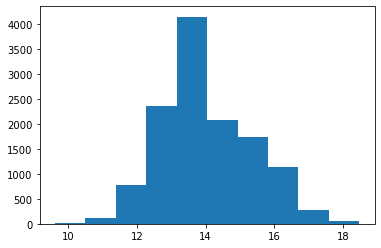

In [82]:
plt.hist(target)

# Random Forest

In [44]:
'''
scaler=MinMaxScaler()

X = df.copy()

y = original_target.copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.33, random_state=1,shuffle=True)

X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)
'''

'\nscaler=MinMaxScaler()\n\nX = df.copy()\n\ny = original_target.copy()\n\nX_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.33, random_state=1,shuffle=True)\n\nX_train = scaler.fit_transform(X_train)\n\nX_test = scaler.fit_transform(X_test)\n'

In [49]:
random = RandomForestRegressor()

random.fit(X_train, y_train)

y_pred = random.predict(X_test)

In [51]:
#Real value MAPE
RF_MAPE= MAPE((y_test),(y_pred))

y_pred1=np.array(np.expm1(y_pred)).reshape(-1,1)
y_test1=np.array(np.expm1(y_test)).reshape(-1,1)

cvs=cross_val_score(random,y_test1,y_pred1).mean()

D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(

In [52]:
print('Train r2 Score:',random.score(X_train, y_train))
print('Test r2 Score:',random.score(X_test, y_test))
print('Adjusted r2 Score:',(1-((1-random.score(X_test, y_test))*((4188-1))/(4188-35-1))))
#print('MSE:', mean_squared_error(y_true=y_test1, y_pred=y_pred1,squared=True))
print('RMSE:', mean_squared_error(y_true=y_test1, y_pred=y_pred1,squared=False))
print('MAE:', mean_absolute_error(y_test1, y_pred1))
print('MAPE:', RF_MAPE)
print('Cross Validation Score:',cvs)

Train r2 Score: 0.9993813384692618
Test r2 Score: 0.9886959289335018
Adjusted r2 Score: 0.9886006393170934
RMSE: 1021000.9795207094
MAE: 268742.8366147796
MAPE: 0.6065097689728344
Cross Validation Score: 0.9750213113419495


# Feature Importance

In [296]:
importances = random.feature_importances_
importances

array([7.44687094e-02, 9.02094234e-01, 1.30812356e-02, 5.22049822e-04,
       1.55989017e-04, 1.61743006e-03, 2.48780550e-04, 1.66502026e-04,
       6.88283099e-04, 4.10119834e-04, 2.08082825e-04, 2.13575398e-04,
       1.76887243e-04, 5.58409036e-04, 1.70350406e-04, 1.86474362e-04,
       1.77333343e-04, 1.75560137e-04, 3.07298949e-04, 3.37706779e-04,
       8.15696782e-04, 2.36468796e-04, 3.51751967e-04, 1.71970974e-04,
       2.51273878e-04, 8.00785113e-04, 2.99031757e-04, 5.23452654e-04,
       2.62766046e-04, 7.21153649e-05, 4.90325767e-05, 2.00642075e-04])

In [309]:
features = df.columns
imp = pd.DataFrame({'Features': features, 'Importance': importances})
imp.head()

,Features,Importance
0,Age,0.074469
1,OVA,0.902094
2,Growth,0.013081
3,Attacking,0.000522
4,Crossing,0.000156


# PCA & Clustering

In [331]:
!pip install yellowbrick

In [332]:
from yellowbrick.cluster import KElbowVisualizer

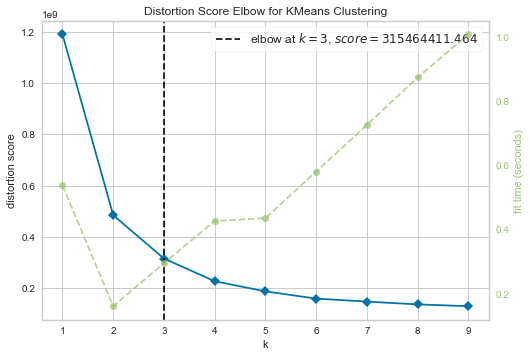

In [334]:
model = KMeans()
fig = KElbowVisualizer(model,k=(1,10))
fig.fit(fifacluster[fifacluster.columns[~fifacluster.columns.isin(['GPOS','BMI','eGPOS'])]])
fig.show();

In [234]:
fifacluster = pd.read_csv('fifacluster.csv')
fifacluster.drop(fifacluster.columns[[0]],axis=1,inplace=True)
fifacluster.head()

,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,...,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,GPOS,BMI,eGPOS
0,337,68,64,61,76,68,369,69,79,79,...,40,56,9,12,13,11,11,MID,27.019314,4
1,367,75,69,54,90,79,408,85,80,70,...,56,45,6,13,6,13,7,MID,23.493061,4
2,342,80,66,43,84,69,406,77,83,80,...,60,47,7,11,7,14,8,MID,24.902645,4
3,380,68,84,63,81,84,374,82,82,63,...,17,63,11,9,13,14,16,ATK,23.775280,1
4,95,13,15,13,37,17,122,26,20,13,...,11,396,77,76,74,91,78,GK,24.709662,3


In [235]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents1 = pca.fit_transform(fifacluster[fifacluster.columns[~fifacluster.columns.isin(['GPOS','BMI','eGPOS'])]])

In [236]:
principalComponents1

array([[-152.68714261,   20.16195441],
       [-209.17252323,   21.27316766],
       [-202.36995639,   -4.3246638 ],
       ...,
       [  51.9407007 ,  -65.71816789],
       [   5.90800811,  -56.50193571],
       [  50.95026871,  103.09604147]])

In [237]:
# Creating a dataframe featuring the two Principal components that we acquired through PCA.
PCA_dataset1 = pd.DataFrame(data = principalComponents1, columns = ['component1', 'component2'] )
PCA_dataset1.head()

,component1,component2
0,-152.687143,20.161954
1,-209.172523,21.273168
2,-202.369956,-4.324664
3,-178.715602,148.886751
4,434.962683,77.102737


In [238]:
# Extracting the two features from above in order to add them to the dataframe.
principal_component1 = PCA_dataset1['component1']
principal_component2 = PCA_dataset1['component2']

<Figure size 576x396 with 0 Axes>

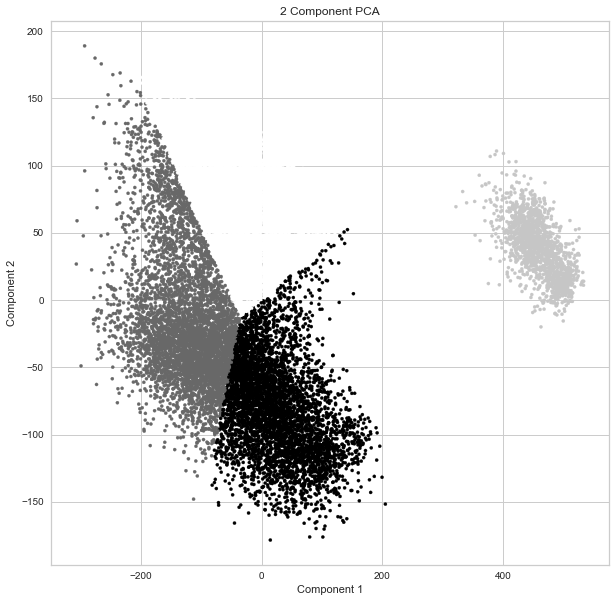

In [348]:
# Visualizing the effects of the Principal Component Analysis.
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
plt.scatter(PCA_dataset1['component1'], PCA_dataset1['component2']
            , c = y_kmeans, s=10
           )

In [341]:
# Implementing the K Means Clustering Algorithm and specifying the number of clusters needed.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 1)
y_kmeans = kmeans.fit_predict(principalComponents1)

In [342]:
# Adding the two principal component features along with the cluster feature ot the dataframe.
fifacluster['principal component 1'] = principal_component1
fifacluster['principal component 2'] = principal_component2
fifacluster['cluster'] = y_kmeans

fifacluster.head()

,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,...,GK Kicking,GK Positioning,GK Reflexes,GPOS,BMI,eGPOS,principal component 1,principal component 2,cluster,const
0,337,68,64,61,76,68,369,69,79,79,...,13,11,11,MID,27.019314,4,-152.687143,20.161954,2,1
1,367,75,69,54,90,79,408,85,80,70,...,6,13,7,MID,23.493061,4,-209.172523,21.273168,2,1
2,342,80,66,43,84,69,406,77,83,80,...,7,14,8,MID,24.902645,4,-202.369956,-4.324664,2,1
3,380,68,84,63,81,84,374,82,82,63,...,13,14,16,ATK,23.775280,1,-178.715602,148.886751,0,1
4,95,13,15,13,37,17,122,26,20,13,...,74,91,78,GK,24.709662,3,434.962683,77.102737,1,1


In [343]:
from matplotlib import colors as mcolors

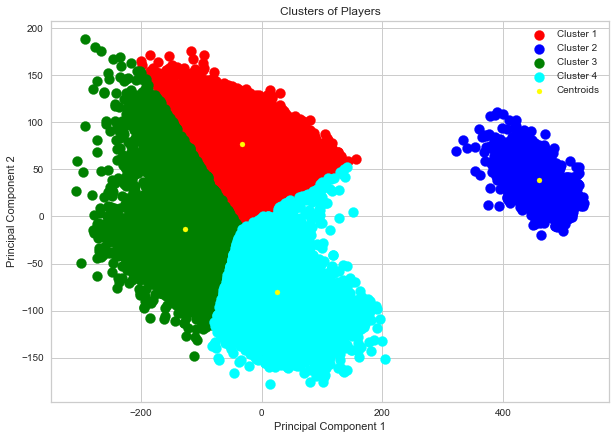

In [349]:
plt.figure(figsize=(10,7))
plt.scatter(principalComponents1[y_kmeans == 0, 0], principalComponents1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(principalComponents1[y_kmeans == 1, 0], principalComponents1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(principalComponents1[y_kmeans == 2, 0], principalComponents1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(principalComponents1[y_kmeans == 3, 0], principalComponents1[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(principalComponents1[y_kmeans == 4, 0], principalComponents1[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
#plt.scatter(principalComponents1[y_kmeans == 5, 0], principalComponents1[y_kmeans == 5, 1], s = 100, c = 'limegreen', label = 'Cluster 6')
#plt.scatter(principalComponents1[y_kmeans == 6, 0], principalComponents1[y_kmeans == 6, 1], s = 100, c = 'silver', label = 'Cluster 7')
#plt.scatter(principalComponents1[y_kmeans == 7, 0], principalComponents1[y_kmeans == 7, 1], s = 100, c = 'rosybrown', label = 'Cluster 8')
#plt.scatter(principalComponents1[y_kmeans == 8, 0], principalComponents1[y_kmeans == 8, 1], s = 100, c = 'mediumpurple', label = 'Cluster 9')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 25, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Players')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

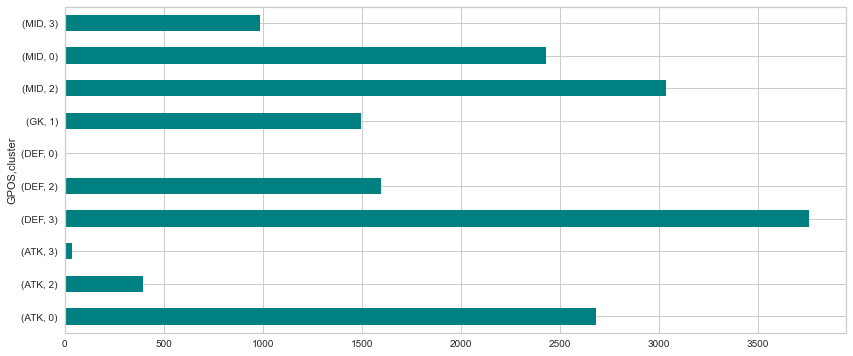

In [345]:
fifacluster.groupby("GPOS")["cluster"].value_counts().plot(kind="barh",color="teal",figsize=(14,6))
plt.show()

In [346]:
fifacluster['const'] = 1
pd.pivot_table(fifacluster, index=['cluster'],columns=['GPOS'],values='const', aggfunc=np.sum,fill_value=0)

GPOS,ATK,DEF,GK,MID
cluster,,,,
0,2681,3,0,2431
1,0,0,1494,0
2,397,1596,0,3034
3,35,3756,0,987


In [347]:
pd.crosstab( index=fifacluster['cluster'],columns=fifacluster['GPOS'])

GPOS,ATK,DEF,GK,MID
cluster,,,,
0,2681,3,0,2431
1,0,0,1494,0
2,397,1596,0,3034
3,35,3756,0,987


# Decision Trees?  Ridge? Lasso?

## Neuron Estimates...

In [243]:
len(X_train)

8502

In [310]:
8502/(1*(35+1))

236.16666666666666

In [248]:
!pip install tensorflow

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'D:\\Program Files (x86)\\Anaconda\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=f41c4fb68da92932f9a9403b8a7f31c50441a86da63d821af07addc22a255842
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2


In [253]:
import tensorflow as tf
from tensorflow import keras

ModuleNotFoundError: No module named 'tensorflow'

## Attempts

In [384]:
for name in fifa21.Name:
    print(fifa21.loc[fifa21['Value'],str(name)]).values[0]

KeyError: 'Luis García'

In [374]:
#for name in fifa21.Name:
    #val =(fifa21.Value.loc[fifa21['Name'] == str(name)]).astype(float)
if fifa21.loc[fifa21.Value ]> 750000000:
    print(fifa.)

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Float64Index([ 600000.0, 5500000.0, 2800000.0, 2200000.0,  325000.0,\n              ...\n               300000.0,  130000.0,  130000.0,  475000.0,  325000.0],\n             dtype='float64', length=12689). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [383]:
val = (float(fifa21.Value.loc[fifa21['Name'] == 'L. Messi']))
(val)

AttributeError: 'float' object has no attribute 'values'

In [498]:
for name in fifa21['Name']:
    if (int(fifa21.OVA.loc[fifa21['Name'] == name])) > 79:
        print(int(fifa21.OVA.loc[fifa21['Name'] == name]))

81
80
80
87
82
82
82
80


TypeError: cannot convert the series to <class 'int'>

In [496]:
for name in fifa21['Name']:
    if (int(fifa21.OVA.loc[fifa21['Name'] == name]) > 79):
        if (int(fifa21.POT.loc[fifa21['Name'] == name]) < int(fifa21.BOV.loc[fifa21['Name'] == name])):
            print(name)
            print(int(fifa21.OVA.loc[fifa21['Name']==name]))



Iniesta
81
P. Scholes
80
R. Keane
80
F. Totti
80


TypeError: cannot convert the series to <class 'int'>

In [313]:
#Splitting the value column to get just the numeric
fifa21['GPOS'] = ['ATT' for i in fifa21.Position = []]

NameError: name 'e' is not defined

In [1529]:
#failed attempt
for height in fifa21.Height:
    H_feet = fifa21.Height[height].split("'")[0]
    H_inch = fifa21.Height[height].split("'")[1].split("\"")[0]

    H_inches = int(H_feet) * 12 + int(H_inch)

    BMI = 703*W/H**2

    print(BMI)

KeyError: 61

# FIFA 20 viZ

In [395]:
fifa.unstack

<bound method DataFrame.unstack of        sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2         190871  https://sofifa.com/player/190871/neymar-da-sil...   
3         200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4         183277  https://sofifa.com/player/183277/eden-hazard/2...   
...          ...                                                ...   
18273     245006  https://sofifa.com/player/245006/shuai-shao/20...   
18274     250995  https://sofifa.com/player/250995/mingjie-xiao/...   
18275     252332  https://sofifa.com/player/252332/wei-zhang/20/...   
18276     251110  https://sofifa.com/player/251110/haijian-wang/...   
18277     233449  https://sofifa.com/player/233449/ximing-pan/20...   

              short_name                            long_name  age  \
0               L. Messi       Lionel Andr

In [103]:
#fifa = fifa.drop(columns=['player_url','sofifa_id'])
fifa = fifa.rename({'short_name':'name'},axis=1)

In [83]:
fifa

,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,

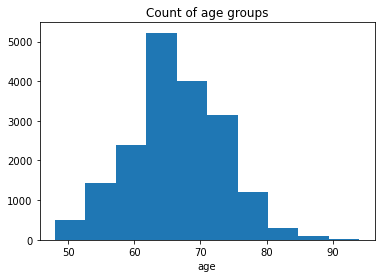

In [260]:
plt.hist(fifa.overall,bins=10)
plt.title('Count of age groups')
plt.xlabel('age')
plt.show()

In [85]:
fifa.describe()
pd.set_option('display.max_columns', None)

fifa.columns
fifa[36:]

,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
36,T. Kroos,Toni Kroos,29,1990-01-04,183,76,Germany,Real Madrid,88,88,57000000,330000,CM,Right,4,5,3,Medium/Medium,Normal,Yes,116900000.0,"#Playmaker , #Crosser, #Complete Midfielder",LCM,8.0,NaN,2014-07-17,2023.0,SUB,8.0,45.0,80.0,90.0,81.0,70.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,"Argues with Officials, Finesse Shot, Crowd Fav...",88,75,58,91,82,80,86,84,92,89,50,41,60,87,71,87,30,74,73,86,60,76,75,89,73,88,72,70,62,10,11,13,7,10,75+3,75+3,75+3,78+3,79+3,79+3,79+3,78+3,81+3,81+3,81+3,79+3,85+3,85+3,85+3,79+3,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3
37,M. Reus,Marco Reus,30,1989-05-31,180,71,Germany,Borussia Dortmund,88,88,56000000,170000,"CAM, LM, ST",Right,4,4,4,High/Medium,Lean,Yes,92400000.0,"#Dribbler, #Playmaker , #Distance Shooter, #F...",CAM,11.0,NaN,2012-07-01,2023.0,ST,11.0,85.0,88.0,84.0,87.0,45.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Avoids Using Weaker Foot, Bea...",82,87,49,86,90,87,89,86,77,88,85,85,86,87,84,88,71,76,67,87,51,48,89,86,90,85,49,37,45,12,12,13,13,11,82+3,82+3,82+3,86+3,86+3,86+3,86+3,86+3,86+3,86+3,86+3,85+3,80+3,80+3,80+3,85+3,69+3,65+3,65+3,65+3,69+3,64+3,55+3,55+3,55+3,64+3
38,P. Aubameyang,Pierre-Emerick Aubameyang,30,1989-06-18,187,80,Gabon,Arsenal,88,88,57000000,205000,"ST, LM",Right,3,4,4,Medium/Low,Lean,Yes,108300000.0,"#Poacher, #Speedster, #Complete Forward",LM,14.0,NaN,2018-01-31,2021.0,NaN,NaN,94.0,85.0,75.0,80.0,37.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Beat Offside Trap, Early Crosser, Speed...",76,89,78,77,86,79,80,74,64,82,93,95,76,87,69,82,79,78,74,79,43,48,90,77,76,85,27,25,36,6,9,15,9,9,84+3,84+3,84+3,83+3,83+3,83+3,83+3,83+3,81+3,81+3,81+3,81+3,74+3,74+3,74+3,81+3,64+3,58+3,58+3,58+3,64+3,61+3,51+3,51+3,51+3,61+3
39,S. Mané,Sadio Mané,27,1992-04-10,175,69,Senegal,Liverpool,88,88,62000000,220000,"LW, LM",Right,3,4,4,High/Medium,Normal,Yes,114700000.0,"#Speedster, #Dribbler, #Acrobat",LW,10.0,NaN,2016-07-01,2023.0,NaN,NaN,94.0,83.0,77.0,89.0,44.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,"Selfish, Early Crosser",74,87,81,81,75,89,76,64,71,87,95,93,92,90,86,84,86,85,67,77,75,35,90,83,71,84,42,42,38,10,10,15,7,14,85+3,85+3,85+3,86+3,87+3,87+3,87+3,86+3,85+3,85+3,85+3,85+3,78+3,78+3,78+3,85+3,67+3,63+3,63+3,63+3,67+3,64+3,57+3,57+3,57+3,64+3
40,A. Laporte,Aymeric Laporte,25,1994-05-27,189,85,France,Manchester City,87,90,56500000,195000,"CB, LB",Left,2,3,2,Medium/Medium,Normal,Yes,108800000.0,"#Tackling , #Tactician",LCB,14.0,NaN,2018-01-30,2024.0,NaN,NaN,64.0,50.0,71.0,68.0,88.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,Leadership,58,45,86,81,40,63,61,69,80,77,61,66,59,87,60,68,78,78,85,47,79,87,54,65,44,85,88,89,88,10,11,5,14,5,65+2,65+2,65+2,64+2,66+2,66+2,66+2,64+2,67+2,67+2,67+2,67+2,74+2,74+2,74+2,67+2,78+2,82+2,82+2,82+2,78+2,80+2,85+2,85+2,85+2,80+2
...,...,...,...,...,...,

In [86]:
fifa = fifa.dropna()
(fifa.isna()==True).sum()

short_name    0
long_name     0
age           0
dob           0
height_cm     0
             ..
lb            0
lcb           0
cb            0
rcb           0
rb            0
Length: 102, dtype: int64

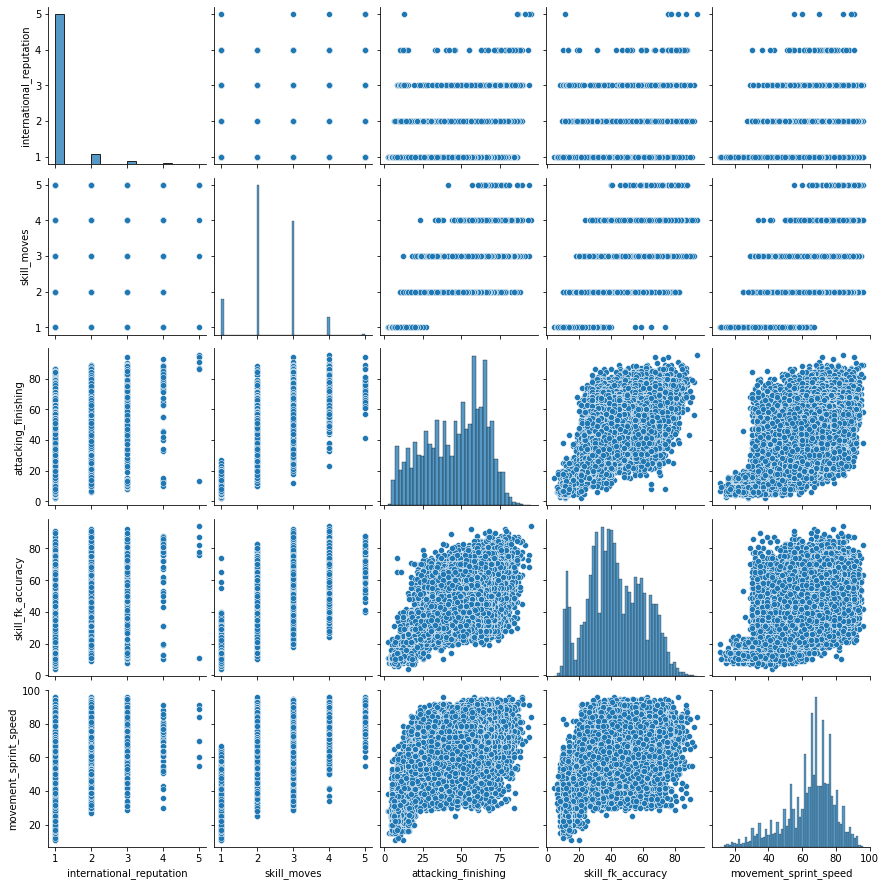

In [89]:
sns.pairplot(fifa[["international_reputation","skill_moves","attacking_finishing","skill_fk_accuracy","movement_sprint_speed"]], palette='deep')
plt.show()

In [113]:
top_speed = fifa.sort_values(by=['movement_sprint_speed'], ascending=False).head(10)
fk = fifa.sort_values(by=['skill_fk_accuracy'], ascending=False).head(10)
sk = fifa.sort_values(by=['skill_moves',"overall"], ascending=False).head(10)
finish = fifa.sort_values(by=['attacking_finishing'], ascending=False).head(10)

D:\Program Files (x86)\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


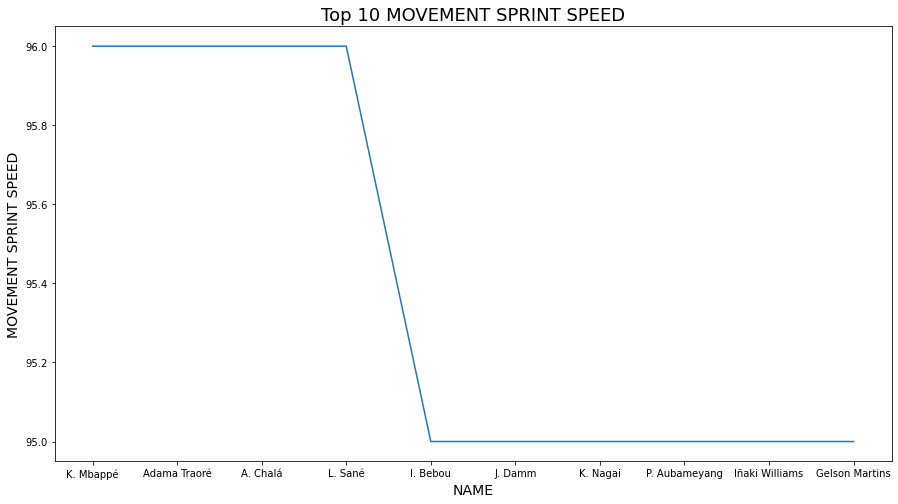

D:\Program Files (x86)\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


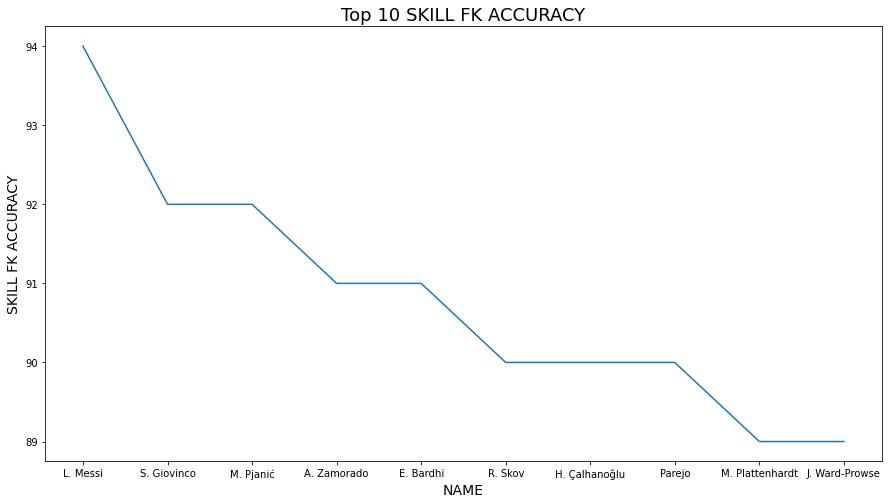

D:\Program Files (x86)\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


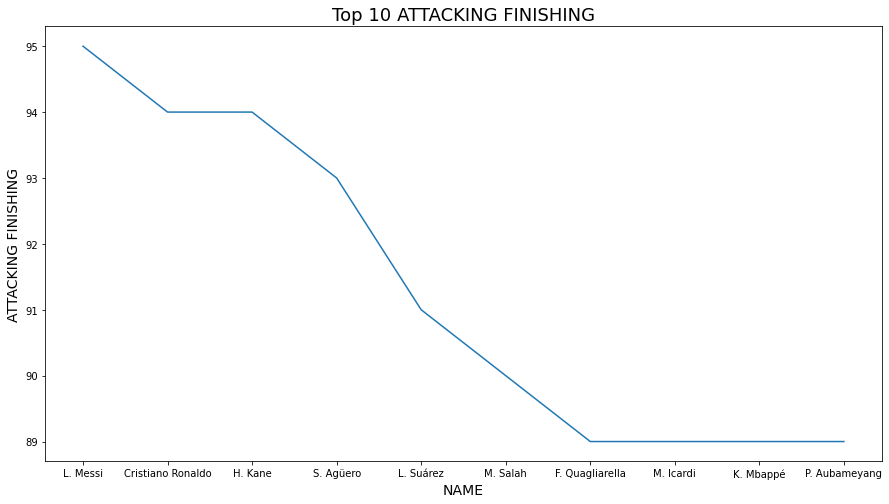

D:\Program Files (x86)\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


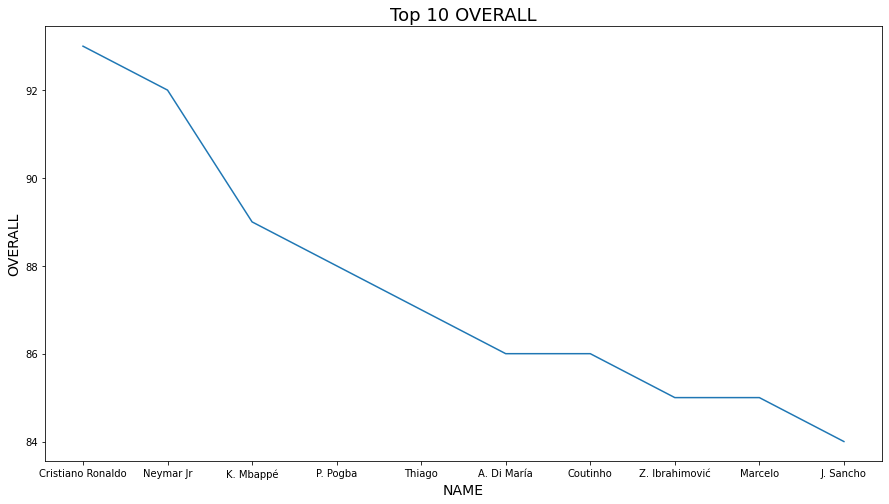

In [190]:
for i in ['movement_sprint_speed','skill_fk_accuracy','attacking_finishing']:
    plt.figure(figsize=[15,8])
    criteria = fifa.sort_values(by=i,ascending=False).head(10)
    sns.lineplot(criteria['name'],criteria[i])
    plt.xlabel('NAME',fontsize=14)
    plt.ylabel(str(i).upper().replace('_',' '),fontsize=14)
    plt.title('Top 10 '+i.upper().replace('_',' '),fontsize=18)
    plt.show()
for j in ['overall']:
    sk = fifa.sort_values(by=['skill_moves',"overall"], ascending=False).head(10)
    plt.figure(figsize=[15,8])
    sns.lineplot(sk['name'],sk[j])
    plt.xlabel('NAME',fontsize=14)
    plt.ylabel(str(j).upper().replace('_',' '),fontsize=14)
    plt.title('Top 10 '+j.upper().replace('_',' '),fontsize=18)
    plt.show()

In [194]:
help(sns.relplot)

Help on function relplot in module seaborn.relational:

relplot(*, x=None, y=None, hue=None, size=None, style=None, data=None, row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend='auto', kind='scatter', height=5, aspect=1, facet_kws=None, units=None, **kwargs)
    Figure-level interface for drawing relational plots onto a FacetGrid.
    
    This function provides access to several different axes-level functions
    that show the relationship between two variables with semantic mappings
    of subsets. The ``kind`` parameter selects the underlying axes-level
    function to use:
    
    - :func:`scatterplot` (with ``kind="scatter"``; the default)
    - :func:`lineplot` (with ``kind="line"``)
    
    Extra keyword arguments are passed to the underlying function, so you
    should refer to the documentation for each to see kind-spe

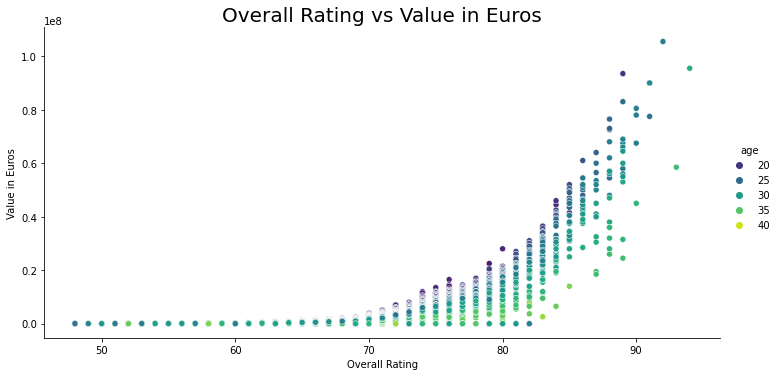

In [197]:
sns.relplot(x='overall',y='value_eur',hue='age',palette = 'viridis',sizes=(15, 200),aspect=2,data=fifa)
plt.title('Overall Rating vs Value in Euros',fontsize = 20)
plt.xlabel('Overall Rating')
plt.ylabel('Value in Euros')
plt.show()

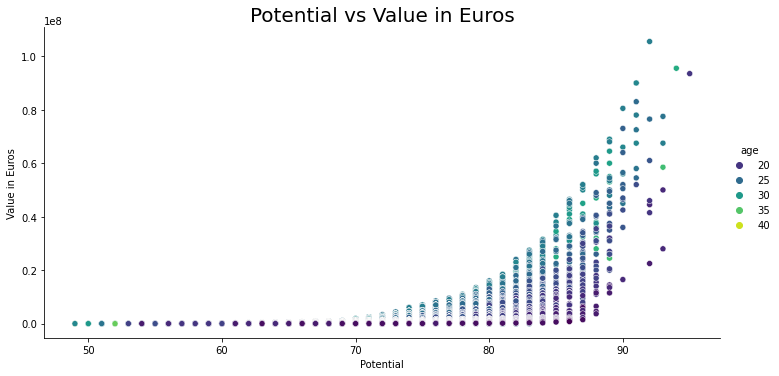

In [501]:
sns.relplot(x='potential',y='value_eur',hue='age',palette = 'viridis',sizes=(15, 200),aspect=2,data=fifa)
plt.title('Potential vs Value in Euros',fontsize = 20)
plt.xlabel('Potential')
plt.ylabel('Value in Euros')
plt.show()

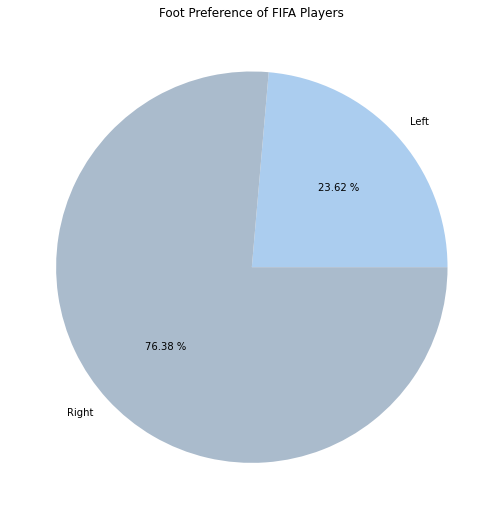

In [201]:
left = fifa.loc[fifa['preferred_foot'] == 'Left'].count()[0]
right = fifa.loc[fifa['preferred_foot'] == 'Right'].count()[0]

plt.figure(figsize=(12,9))

labels = ['Left', 'Right']
colors = ['#abcdef', '#aabbcc']

plt.pie([left, right], labels = labels, colors=colors, autopct='%.2f %%')

plt.title('Foot Preference of FIFA Players')

plt.show()

<AxesSubplot:xlabel='count', ylabel='nationality'>

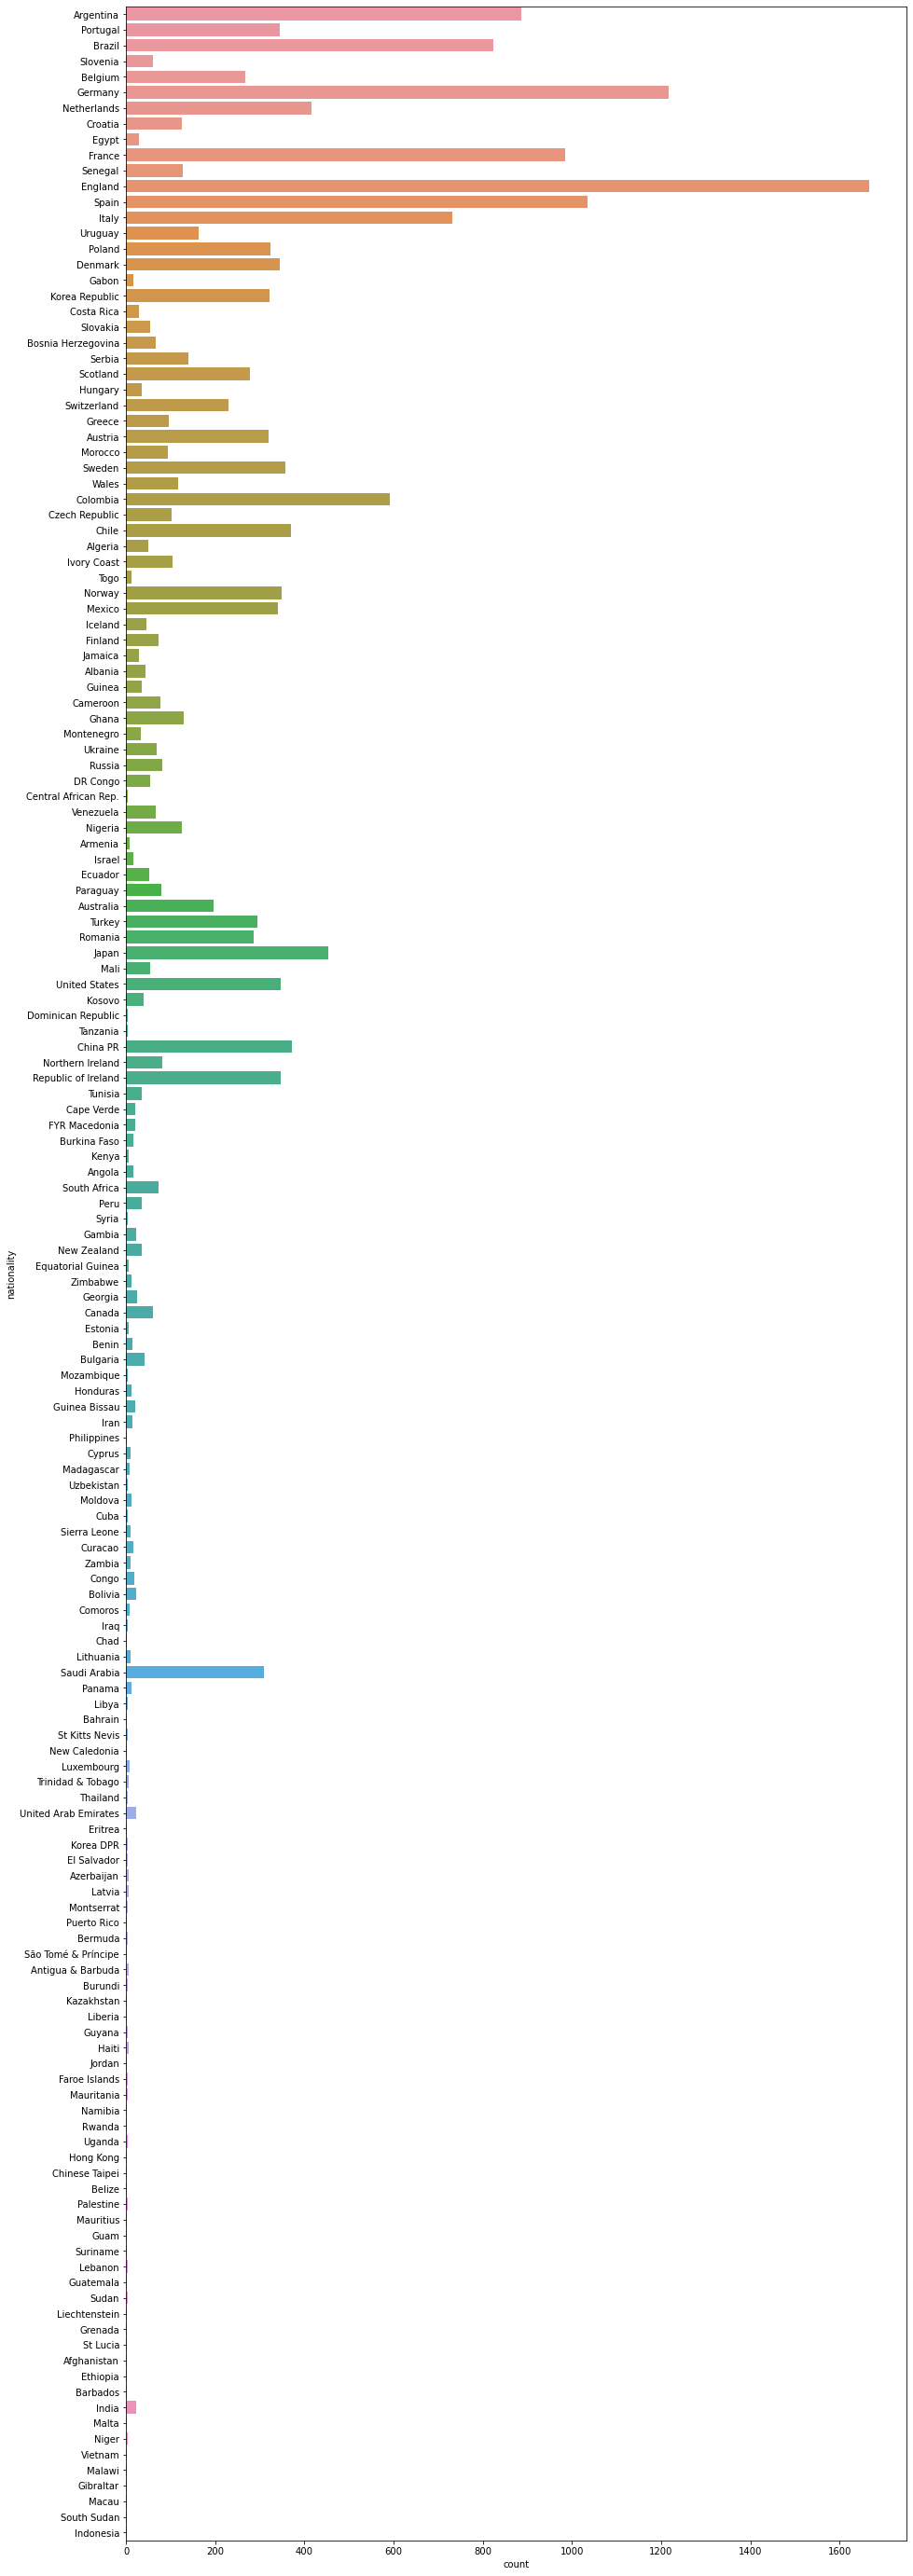

In [209]:
plt.figure(figsize=(15,50))
sns.countplot(y=fifa.nationality)

In [215]:
print(list(fifa.columns))

['name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power

In [218]:
#weights
a = 0.5
b = 1
c= 2
d = 3
 
#GoalKeeping Characterstics
fifa['gk_Shot_Stopper'] = (b*fifa.movement_reactions + b*fifa.mentality_composure + a*fifa.movement_sprint_speed + a*fifa.power_strength + c*fifa.power_jumping + b*fifa.gk_positioning + c*fifa.gk_diving + d*fifa.gk_reflexes + b*fifa.gk_handling)/(2*a + 4*b + 2*c + 1*d)
fifa['gk_Sweeper'] = (b*fifa.movement_reactions + b*fifa.mentality_composure + b*fifa.movement_sprint_speed + a*fifa.attacking_short_passing + a*fifa.skill_long_passing + b*fifa.power_jumping + b*fifa.gk_positioning + b*fifa.gk_diving + d*fifa.gk_reflexes + b*fifa.gk_handling + d*fifa.gk_kicking + c*fifa.mentality_vision)/(2*a + 4*b + 3*c + 2*d)


D:\Program Files (x86)\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Players')

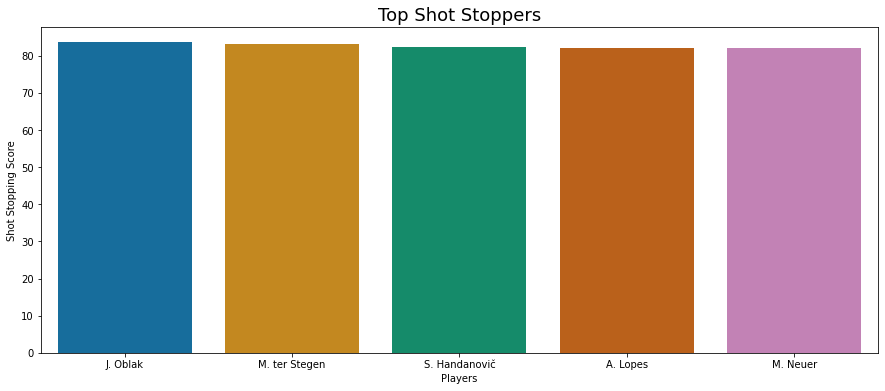

In [222]:
plt.figure(figsize=(15,6))
 
# Generate sequential data and plot
sd = fifa.sort_values('gk_Shot_Stopper', ascending=False)[:5]
x1 = np.array(list(sd['name']))
y1 = np.array(list(sd['gk_Shot_Stopper']))
sns.barplot(x1, y1, palette= "colorblind")
plt.title('Top Shot Stoppers',fontsize=18)
plt.ylabel("Shot Stopping Score")
plt.xlabel('Players')

D:\Program Files (x86)\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Players')

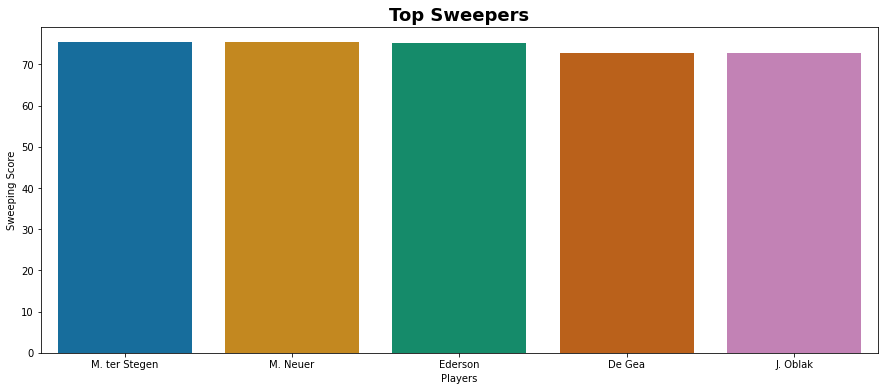

In [240]:
plt.figure(figsize=(15,6))
sd = fifa.sort_values('gk_Sweeper', ascending=False)[:5]
x2 = np.array(list(sd['name']))
y2 = np.array(list(sd['gk_Sweeper']))
sns.barplot(x2, y2, palette= "colorblind")
plt.title('Top Sweepers',fontsize=18,fontweight='bold')
plt.ylabel("Sweeping Score")
plt.xlabel('Players')